Modify the scratch code of gaussian mixture clustering in our lecture:
- Modify so it performs early stopping when the log likelihood does not improve anymore.  Note that if you log the normal distribution, you will get negative sign.  Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
- Perform plotting every 5 iterations on the resulting clusters.

NLL smaller?  -36948.27653905188
NLL difference:  36948.27653905188
NLL smaller?  -640085.4785117261
NLL difference:  1959.8772708321922
NLL smaller?  -639610.1936275006
NLL difference:  6.927472482202575
Final NLL:  -639607.6895109342
final difference:  2.504116566386074


Text(0.5, 1.0, 'Final')

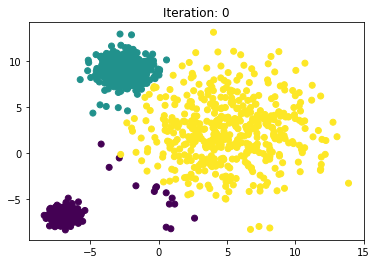

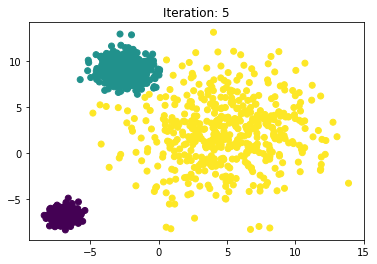

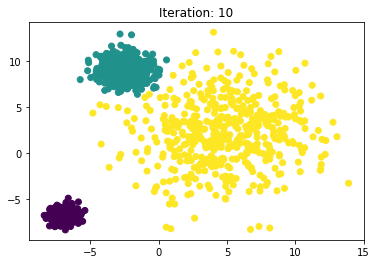

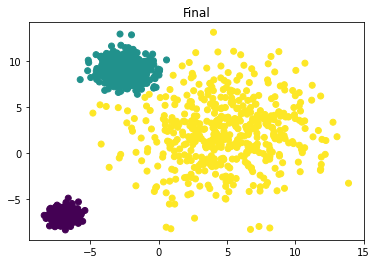

In [1]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20
oldNLL = 0

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])

    NLL = 0
    for i in range(m):
        for k in range(K):
            NLL += math.log(pi[k])
            NLL += multivariate_normal.logpdf(
                X[i], mean=mean[:, k], cov=cov[k])
    
    #every 5 iteration plot once
    if(iteration % 5 == 0):
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
        print("NLL smaller? ", NLL)
        print("NLL difference: ", math.fabs(NLL - oldNLL))
    
    if(math.fabs(NLL-oldNLL) < 5):
        print("Final NLL: ", NLL)
        print("final difference: ", math.fabs(NLL - oldNLL))
        break
    oldNLL = NLL
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    
    #PI
    pi = NK / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / NK
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)
        

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")